# Outline
Structure of a dataset + querying scans (pyBIDS)

---


Structure of a single image + loading images (nibabel)

---


Image preprocessing

---


Visualizing images (nilearn)

---


Basic image manipulations (nilearn)

---

Functional connectivity analysis (nilearn)

---


Handling a complex workflow (nipype)


# Querying a scan from a neuroimaging dataset

Most neuroimaging datasets should be organized into BIDS (Brain Imaging Data Structure) format - including yours! This standardized format gives precise description of how each file type should be named. It has 3 advantages:

1.   Facilitates sharing of data
2.   Enables compatibility with certain softwares
3.   Ensures data is organized in the most useful way possible

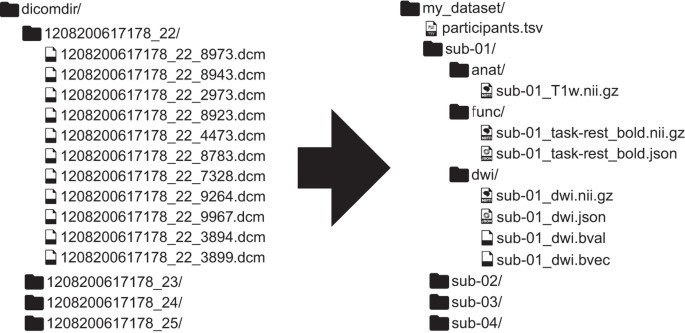




Any dataset in BIDS format can be parsed using pyBIDS.

In [2]:
import bids

# Download the bids structure of a resting-state fMRI dataset from openNeuro (ds000030) (this doesn't actually download the data within the dataset)
!wget -q -O ds000030.zip https://github.com/OpenNeuroDatasets/ds000030/archive/refs/heads/master.zip
!unzip -q ds000030.zip
!mv ds000030-master ds000030

# load the dataset with pyBIDS
dataset_layout = bids.BIDSLayout("ds000030", validate=False)

dataset_layout


mv: cannot move 'ds000030-master' to 'ds000030/ds000030-master': Directory not empty


BIDS Layout: ...A2/fUS/python_lecture/ds000030 | Subjects: 272 | Sessions: 0 | Runs: 0

Extract a list of all the subjects in the dataset

In [3]:
#extract the entire list of subjects
sub_list = dataset_layout.get_subjects()

#show the first 10
sub_list[0:10]

['10159',
 '10171',
 '10189',
 '10193',
 '10206',
 '10217',
 '10225',
 '10227',
 '10228',
 '10235']

Extract a list of a specific scan type (e.g. bold fmri scans)

In [4]:
# Get BOLD files
bold_files = dataset_layout.get(suffix='bold', task = 'rest', extension='nii.gz', return_type='file')
print(f"Found {len(bold_files)} resting-state BOLD files")
print(bold_files[:2])  # show a few

Found 536 resting-state BOLD files
['/media/DATA2/fUS/python_lecture/ds000030/ds000030-master/sub-10159/func/sub-10159_task-rest_bold.nii.gz', '/media/DATA2/fUS/python_lecture/ds000030/ds000030-master/sub-10171/func/sub-10171_task-rest_bold.nii.gz']


In [5]:
# Get anatomical files
anat_files = dataset_layout.get(suffix='T1w', extension='nii.gz', return_type='file')
print(f"Found {len(anat_files)} T1w files")
print(anat_files[:2])  # show a few

Found 530 T1w files
['/media/DATA2/fUS/python_lecture/ds000030/ds000030-master/sub-10159/anat/sub-10159_T1w.nii.gz', '/media/DATA2/fUS/python_lecture/ds000030/ds000030-master/sub-10171/anat/sub-10171_T1w.nii.gz']


This approach can be used to extract a list of any aspect of the dataset (list of sessions, task names, metadata etc)

In [6]:
# Get sessions
print("Sessions:", dataset_layout.get_sessions())

# Look at file metadata
metadata = dataset_layout.get_metadata(bold_files[0])
print("Metadata:", metadata)

# Check task name
print("Task name:", dataset_layout.get_tasks())

Sessions: []
Metadata: {'AccelNumReferenceLines': 24, 'AccelerationFactorPE': 2, 'AcquisitionMatrix': '64/0/0/64', 'CogAtlasID': 'trm_4c8a834779883', 'CogPOID': 'COGPO_00086', 'DeviceSerialNumber': '35343', 'EPIFactor': 128, 'EchoTime': 0.03, 'EchoTrainLength': 1, 'EffectiveEchoSpacing': 0.000395, 'FlipAngle': 90, 'ImageType': 'ORIGINAL/PRIMARY/M/ND/MOSAIC', 'ImagingFrequency': 123249486, 'InPlanePhaseEncodingDirection': 'COL', 'Instructions': "For the following part, you do not need to do anything other than keep your eyes open and remain relaxed. It is still important that you remain still and do not fall asleep, but you don't need to respond to anything. Any questions?", 'MRAcquisitionType': '2D', 'MagneticFieldStrength': 3, 'ManufacturerModelName': 'TrioTim', 'NumberOfAverages': 1, 'NumberOfPhaseEncodingSteps': 63, 'PatientPosition': 'HFS', 'PercentPhaseFieldOfView': 100, 'PercentSampling': 100, 'PhaseEncodingDirection': 'j-', 'PixelBandwidth': 1420, 'ProtocolName': 'BOLD - RESTING

# Loading functional data with nibabel

## What is inside a scan?

Each scan has two parts 1) an array of the data itself, 2) an image header - essentially metadata instructing how the data should be displayed in space.
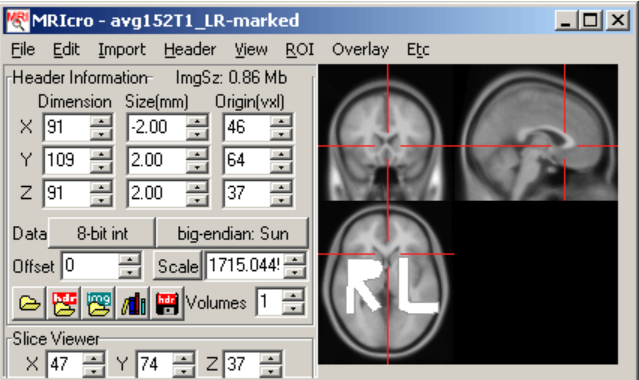

Nibabel is a simple package for loading and visualizing neuroimaging data of various formats including volumetric, surface, connectivity and tractography (nifti, gifti, cifti, freesurfer files, Philips PAR/REC, Siemens ECAT, TrackViz .trk).

## Locate a functional and structural scan

In [7]:
#Base directory for fmriprep output
fmriprep_dir = './data/ds000030/derivatives/fmriprep/'
layout= bids.BIDSLayout(fmriprep_dir, validate = False)

#automatically find the path to each scan
anat_file = layout.get(subject='10159', datatype='anat', space='MNI152NLin2009cAsym', suffix='preproc', extension='.nii.gz', return_type='file')[0]			   
anat_mask_file = layout.get(subject='10159', datatype='anat', space='MNI152NLin2009cAsym', suffix="brainmask", extension='.nii.gz',return_type='file') [0]		
bold_file = layout.get(subject='10159', datatype='func', space='MNI152NLin2009cAsym', task = 'rest', suffix="preproc", extension='.nii.gz',return_type='file')[0]		
bold_mask_file = layout.get(subject='10159', datatype='func', space='MNI152NLin2009cAsym', task = 'rest', suffix="brainmask", extension='.nii.gz',return_type='file')[0]		

## Load the scan into python

In [8]:
import nibabel as nb
# Load a functional image of subject 001
bold_img = nb.load(bold_file)
print(bold_img)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (65, 77, 49, 152)
affine:
[[   3.    0.   -0.  -96.]
 [   0.    3.   -0. -132.]
 [   0.    0.    4.  -78.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  4  65  77  49 152   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 3. 3. 4. 2. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 8
cal_max         : 1932.0974
cal_min         : -128.37485
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'')
aux_file 

This file is a nifti object. Calling print on the nifti object will print the image header.

Notice the affine matrix - this is a really important matrix that relates the position and size of the image to the real world. 
The diagonal values 3, 3, 4 indicate the voxel size along the x, y and z axes. The last column [-96, -132, -78] tells us that the top-left voxel in the image is physically located at (-96, -132, -78) mm in the scanner's coordinate system. If you manipulate this affine matrix, you can scale, rotate and translate the image in space.

## Access the data as an array

In [9]:
data = bold_img.get_fdata()
print(data.shape)
data

(65, 77, 49, 152)


array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

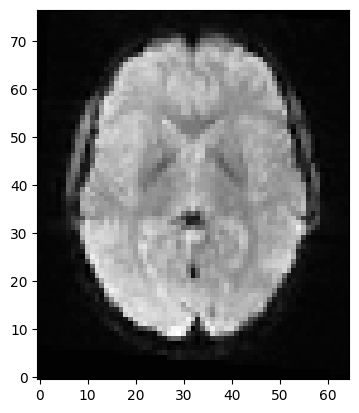

In [10]:
# we can plot the image using imgshow in the same way that we plotted arrays of data in the past - remember to extract a 2D slice first
import matplotlib.pyplot as plt
bold_slice20_timepoint0 = data[:, :, 20, 0]
plt.imshow(bold_slice20_timepoint0.T, cmap='Greys_r', origin = 'lower')

You can use any of the methods for manipulating arrays that we learned in the past to alter the image and save the output as a new nifti.

## Save the array as a nifti

In [11]:
# for example, multiply all the values by two
data_doubled = data*2

# convert array to a nifti object (note that you need to provde the affine describing the image position in space, here we haven't altered the position so we can copy the affine from the original image)
# the header isn't required but it's better to provide if you have it
new_img = nb.Nifti1Image(data_doubled, affine=bold_img.affine, header=bold_img.header)

# now, save it to your computer (we indicate any processing that we did using the 'proc' field when using BIDS formatting)
nb.save(new_img, './data/ds000030/derivatives/fmriprep/sub-10159/func/sub-10159_task-rest_proc-doubled_bold.nii.gz')

You could in theory stop here! Once you know how to load the image as an array, you can code yourself various functions for manipulating this array using everything that you know already.

However, there are also existing functions for most common image manipulations that already exist, to make your life easier.

# Preprocessing

Now that you can access your data, the first step is to preprocess it so that it is ready for use. Preprocessing with many steps.

A fundamental step is aligning data to the same space, there are multiple levels of alignment: 1) across timepoints within the functional scan, 2) between the functional and anatomical scan of the same subject, 3) between the anatomical scan of each subject and a template (commonspace alignment). This process ensures that you can compare the same voxel/region across subjects and also has other benefits - you can use the mask and parcellation from the template.

It is NOT recommended to code this all yourself in python!

In the past, tools for processing were developed in FSL, AFNI, FREESURFER, ANTS, SPM. Recently, the key tools have been aggregated into a single toolkit called fMRIprep (https://github.com/nipreps/fmriprep) - it is built with python. A similar toolkit for rodents is RABIES (https://github.com/CoBrALab/RABIES). 

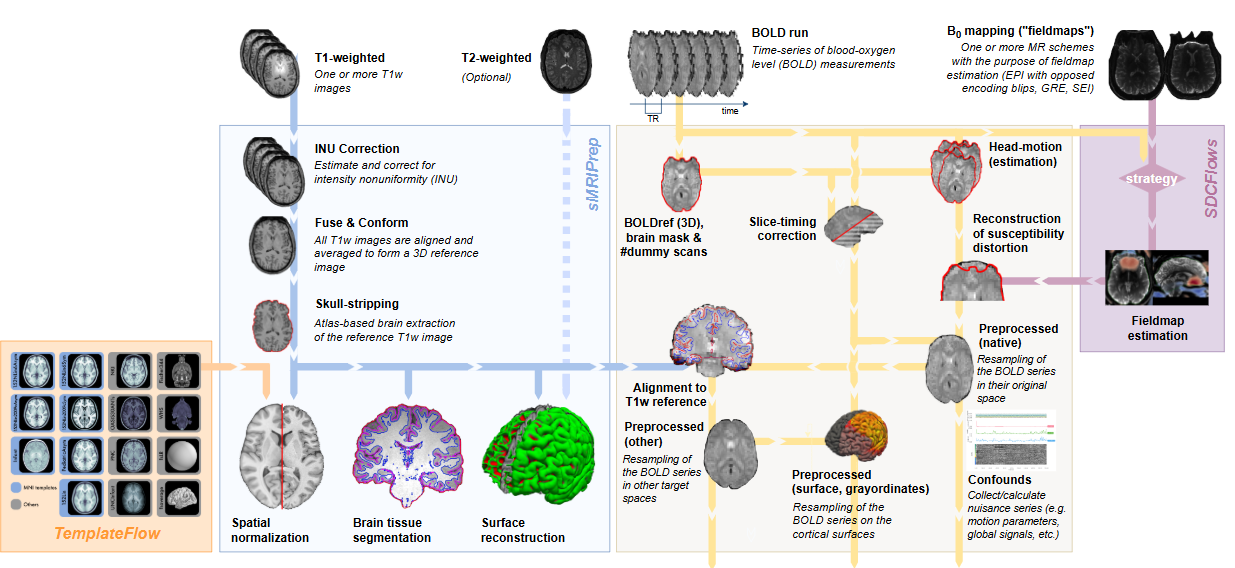

Once you have generated preprocessed commonspace outputs with one of these toolkits, we can examine and analyze the outputs! All of the scans that we work with below are outputs from fMRIprep.

# Vizualize the scan with nilearn

Nilearn is a flexible package with many tools for manipulating nifti images. While nibabel is mostly for loading images, nilearn has a much broader range of methods.

In [12]:
from nilearn import image as nli
from nilearn import plotting

bold_img =  nli.load_img(bold_file) #now we're using nilearn to load the image so the function is slightly different (was nb.load())
anat_img =  nli.load_img(anat_file)
print(bold_img)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (65, 77, 49, 152)
affine:
[[   3.    0.   -0.  -96.]
 [   0.    3.   -0. -132.]
 [   0.    0.    4.  -78.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  4  65  77  49 152   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 3. 3. 4. 2. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 8
cal_max         : 1932.0974
cal_min         : -128.37485
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'')
aux_file 

Even though we're using nilearn, the image object is still a nibabel nifti! Nilearn is built on top of nibabel but it does fancier stuff. In some cases, you can apply nilearn functions onto objects loaded with nibabel but in other cases it may not work so it's better to choose in advance which package you need for a given script.

## Interactive plot

/home/murosevic/miniconda3/envs/env312/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



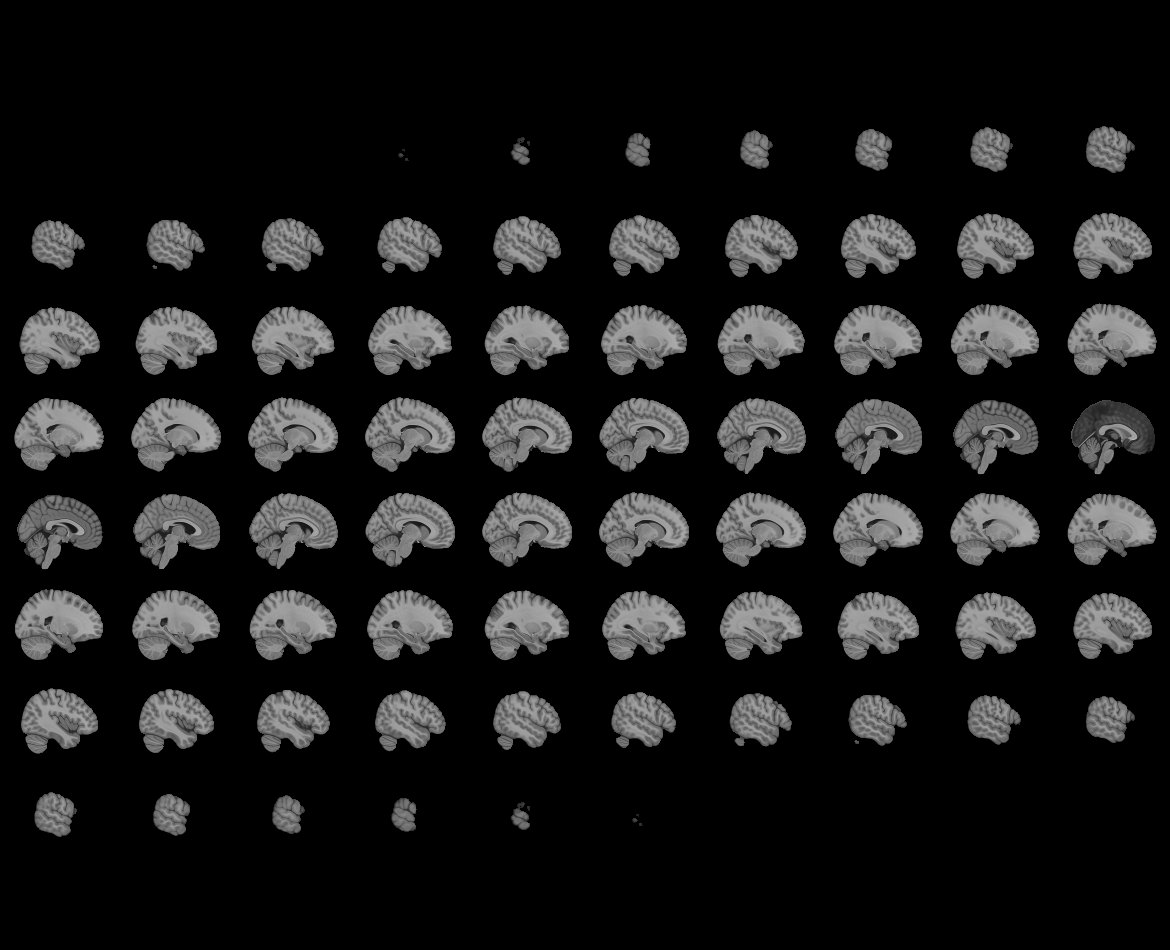
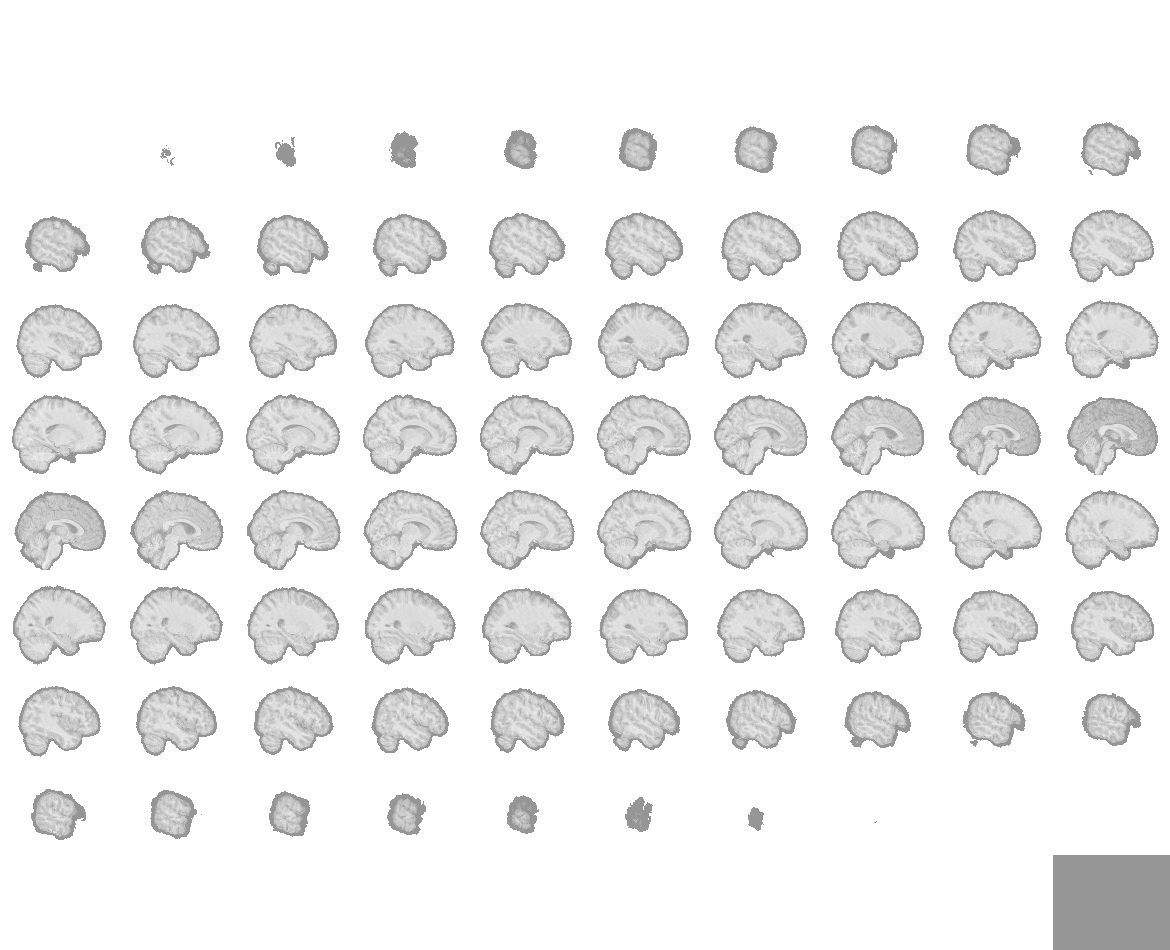

In [13]:
#here we're plotting the anatomical image
plotting.view_img(anat_img, cmap='Greys_r') #if you're using JupyterLab or VSCode, you don't need to save the view in a variable


## Static plot

view_img cannot be used to save figures for publication.

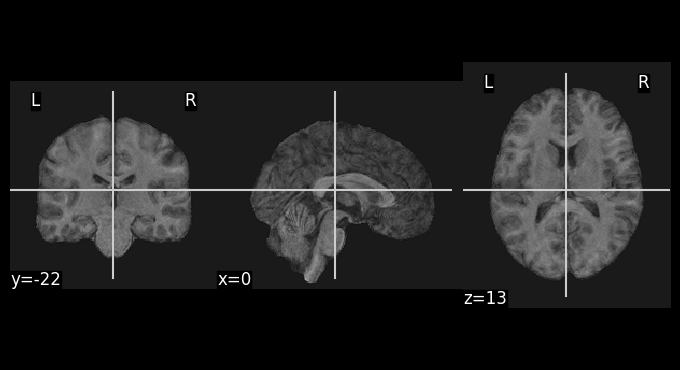

In [14]:
plotting.plot_anat(anat_img)

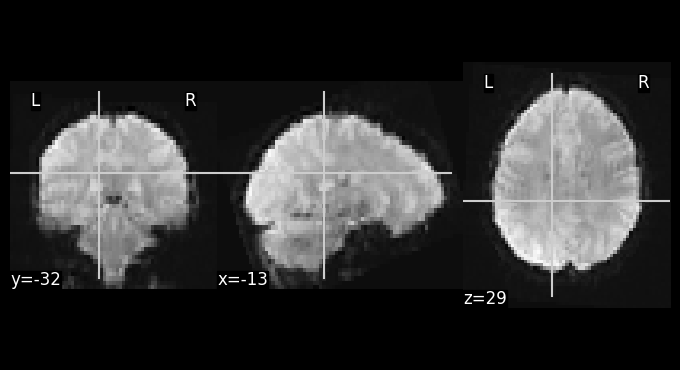

In [15]:
# to plot the functional scan, we need to select a single timepoint
bold_img_t100 = bold_img.slicer[..., 100]
plotting.plot_epi(bold_img_t100, cmap = 'Greys_r')

## Plot multiple images at the same time

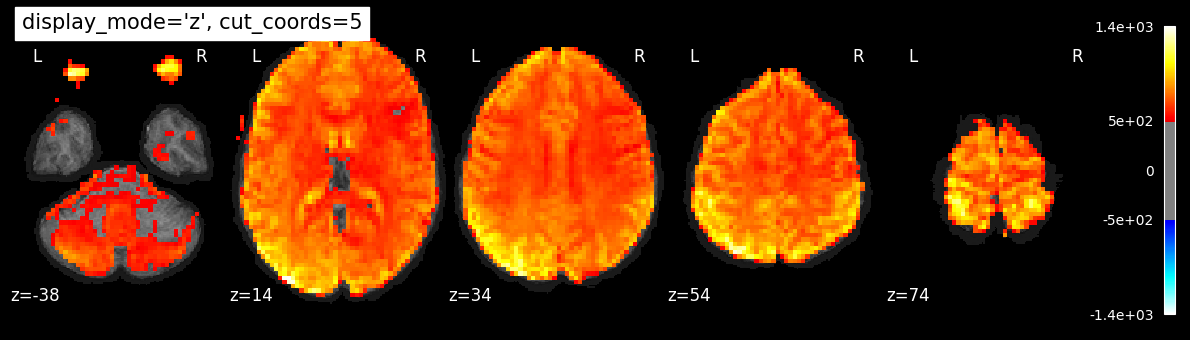

In [16]:
#the anatomical image is the background (bg_img) and the BOLD image at timepoint 100 is plotted on top with some transparency
plotting.plot_stat_map(bold_img_t100, bg_img=anat_img, display_mode='z', cut_coords=5, threshold=500, 
                       title="display_mode='z', cut_coords=5")

This method is often used for plotting statistical overlays (e.g. activation on top of an anatomical image)

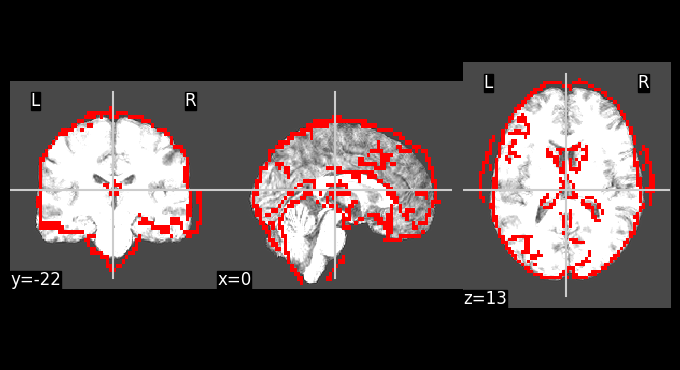

In [17]:
# plot the edges of the BOLD scan on top of the anatomical
display = plotting.plot_anat(anat_img, dim=-1.0)
display.add_edges(bold_img_t100, color='r')

This is useful for checking overlap between scans - for example to check if alignment/registration worked properly.

## Plot a mask or ROI

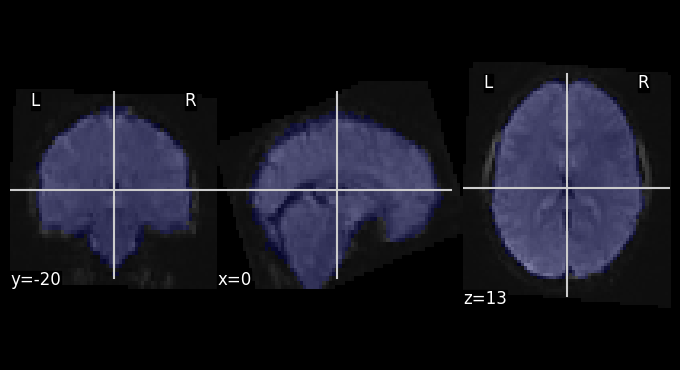

In [18]:
#load the mask
bold_mask = nb.load(bold_mask_file)

#plot the bold timepoint then overlay the brain mask (alpha controls transparency)
plotting.plot_roi(bold_mask, bg_img = bold_img_t100, alpha = 0.3)

More plotting functions here: https://nilearn.github.io/stable/plotting/index.html (glass brain is very pretty!)

# Basic image manipulation with nilearn

## Extract a slice

Why bother? Can be necessary for plotting since you cannot plot a 4D image. Or maybe you want to discard the first 30s due to drift.

In [19]:
bold_img_slice_t100 = bold_img.slicer[:, :, 3:4, 100]

In [20]:
print(f'Shape before slicing: {bold_img.shape}')
print(f'Shape after slicing: {bold_img_slice_t100.shape}')

Shape before slicing: (65, 77, 49, 152)
Shape after slicing: (65, 77, 1)


## Compute the mean image across time

Why bother? The mean image is useful for plotting the EPI, it's less noisy than taking a single timepoint. It's also convenient for registration - register the mean image to the anatomical scan and register each timepoint to the mean image.

Shape of the mean image across time: (65, 77, 49)


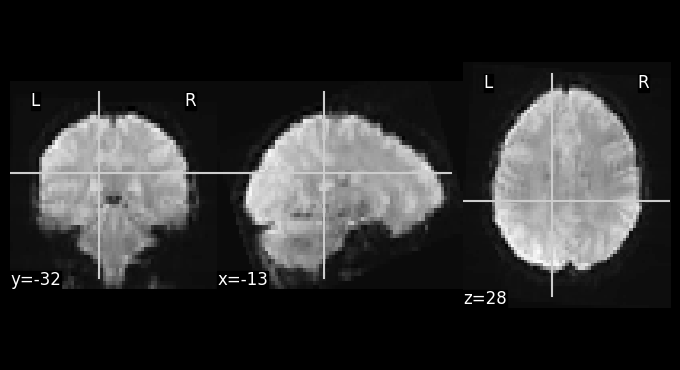

In [21]:
mean_bold = nli.mean_img(bold_img)
print(f'Shape of the mean image across time: {mean_bold.shape}')
plotting.plot_epi(mean_bold, cmap = 'Greys_r') #no longer necessary to use slicer because taking the mean over time returns a 3D image

## Apply a mask

Why bother? Useful for making sure that you are only analyzing voxels from within the brain.

In [22]:
from nilearn.masking import apply_mask

bold_masked_timecourses = apply_mask(bold_img, bold_mask) 
print(f'Shape of the original bold scan: {bold_img.shape}')
print(f'Shape of the masked bold scan: {bold_masked_timecourses.shape}')

Shape of the original bold scan: (65, 77, 49, 152)
Shape of the masked bold scan: (152, 56422)


NOTE THAT THIS FLATTENS THE OUTPUT! Now you no longer have an image, you have the timecourse for every single voxel within the brain

In [23]:
# you can reover the original image organization (but with the mask applied) using unmask

from nilearn.masking import unmask
img_timecourse = unmask(bold_masked_timecourses, bold_mask)
print(f'Shape of the un-masked bold scan: {img_timecourse.shape}')

Shape of the un-masked bold scan: (65, 77, 49, 152)


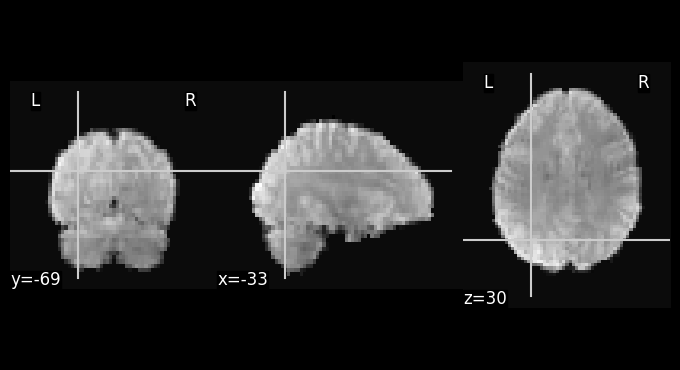

In [24]:
mean_img_timecouse = nli.mean_img(img_timecourse)
plotting.plot_epi(mean_img_timecouse, cmap = 'Greys_r')

## Resample one image to match the resolution of another

Why bother? Sometimes you need a direct voxel by voxel comparison of two images with different resolutions. They may be already in the same space (like functional and anatomical but just with different resolutions). For example, anatomical images have a higher resolution than functional. So you can upsample the functional image or downsample the anatomical image (the latter is easier and generally safer).

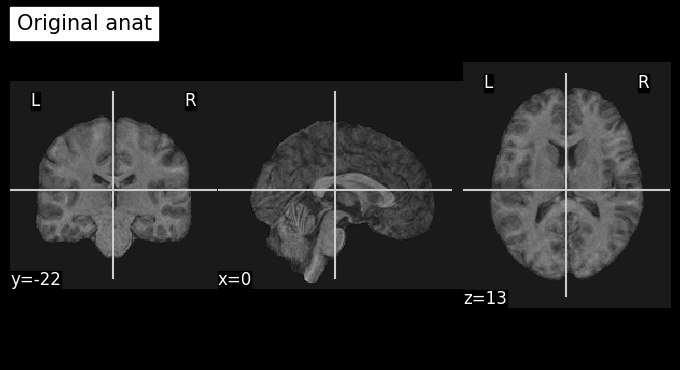

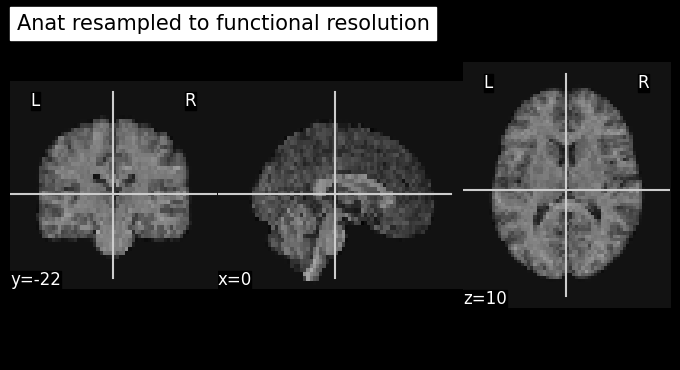

In [25]:
downsampled_anat_img = nli.resample_to_img(source_img = anat_img,target_img = bold_img, interpolation = 'continuous') # use nearest interpolation for masks!
plotting.plot_anat(anat_img, title = 'Original anat')
plotting.plot_anat(downsampled_anat_img, title = 'Anat resampled to functional resolution')

## Other functions

There are many other functions! 

---
Spatial smoothing: nli.smooth_img(mean, fwhm)

---
Arithmetic with images (e.g. adding two images): nli.math_img("img1 + img2", img1=anatomical_image, img2=log_img)

# Functional Connectivity Analysis

## Remove temporal confounds

Functional data (especially BOLD) is often corrupted by many temporal confounds, including motion and respiration/cardiac induced fluctuations. While it is hard to fully remove these from the signal, there are ways of estimating an regressing their timecourses to minimize their effect on FC.

Both fMRIprep and RABIES will produce csvs/tsvs containing the timecourses of various confounds. With RABIES, you can specify which ones you want to regress then and it will do it for you. However, with fMRIprep, you have to do it yourself.

In [26]:
import pandas as pd

#locate the confound file
confound_file = layout.get(subject='10159', datatype='func', task = 'rest', suffix="confounds", extension='tsv',return_type='file')[0]		

#load it as a pandas df
confound_df = pd.read_csv(confound_file, delimiter='\t') #tsv means tab separated, so we specify the delimeter as a tab
confound_df

WhiteMatter  GlobalSignal  stdDVARS  non-stdDVARS  vx-wisestdDVARS  \
0      -0.718803     -0.631908       NaN           NaN              NaN   
1       0.170225      0.113355  1.472061     30.372808         1.267235   
2      -1.022839     -0.931178  1.178192     24.309444         1.057138   
3      -0.555686     -2.363894  1.076487     22.210981         0.977345   
4      -0.763460     -1.739420  1.153934     23.808933         0.986697   
..           ...           ...       ...           ...              ...   
147    -0.251738     -2.838339  1.254266     25.879076         1.168924   
148    -0.622719     -1.422788  1.461609     30.157141         1.321559   
149    -1.020008     -0.620397  1.604539     33.106201         1.435772   
150    -0.331053      0.504321  1.284987     26.512930         1.141168   
151     0.062431      0.445140  1.132674     23.370283         0.998385   

     FramewiseDisplacement  tCompCor00  tCompCor01  tCompCor02  tCompCor03  \
0                      NaN   -0.030958   -0.036611    0.018834   -0.134063   
1                 0.435978    0.002832   -0.020365    0.122464    0.116385   
2                 0.266864    0.022730   -0.049152    0.104392   -0.058369   
3                 0.218989    0.037663   -0.081512    0.061450   -0.142933   
4                 0.247912    0.073360   -0.121796   -0.038977    0.035406   
..                     ...         ...         ...         ...         ...   
147               0.249872    0.063303   -0.083539    0.064197   -0.147500   
148               0.442136    0.025358   -0.249753   -0.015351    0.047580   
149               0.575408    0.042616   -0.025786    0.013324    0.050259   
150               0.309836   -0.009584   -0.164513    0.090699   -0.077558   
151               0.238319   -0.026551   -0.113771   -0.028059    0.059640   

     ...  aCompCor02  aCompCor03  aCompCor04  aCompCor05         X         Y  \
0    ...   -0.042243    0.079307   -0.130801    0.049838  0.047234  0.040508   
1    ...   -0.100713   -0.077533    0.115462    0.055437  0.067167  0.121382   
2    ...   -0.075033   -0.024342   -0.080798   -0.061572  0.008982  0.045107   
3    ...   -0.004928   -0.041053   -0.127155    0.006546  0.015871  0.109043   
4    ...    0.092140   -0.054570    0.055998   -0.042590  0.035098  0.153867   
..   ...         ...         ...         ...         ...       ...       ...   
147  ...   -0.083860    0.003695   -0.167427    0.119808 -0.194503  0.059581   
148  ...   -0.004624    0.151597    0.028494    0.017657 -0.164363  0.156450   
149  ...   -0.074717    0.130454    0.033507    0.072793 -0.168641  0.024655   
150  ...   -0.060173    0.043172   -0.098589   -0.021453 -0.167208  0.105324   
151  ...   -0.014408    0.102376    0.019103    0.096528 -0.173362  0.058904   

            Z      RotX      RotY      RotZ  
0   -0.161653  0.001001  0.001525 -0.002112  
1    0.011465 -0.000742  0.001039 -0.001099  
2    0.008069  0.000808  0.001525 -0.001644  
3    0.036167 -0.000851  0.001123 -0.001303  
4    0.174341 -0.001019  0.001023 -0.000659  
..        ...       ...       ...       ...  
147  0.726272  0.001263  0.002542  0.002841  
148  0.957063 -0.000018  0.002705  0.003084  
149  0.615690  0.001776  0.002545  0.003079  
150  0.786984  0.000735  0.002632  0.003079  
151  0.677267  0.002065  0.002606  0.002916  

[152 rows x 24 columns]

In [27]:
confound_df.columns

Index(['WhiteMatter', 'GlobalSignal', 'stdDVARS', 'non-stdDVARS',
       'vx-wisestdDVARS', 'FramewiseDisplacement', 'tCompCor00', 'tCompCor01',
       'tCompCor02', 'tCompCor03', 'tCompCor04', 'tCompCor05', 'aCompCor00',
       'aCompCor01', 'aCompCor02', 'aCompCor03', 'aCompCor04', 'aCompCor05',
       'X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ'],
      dtype='object')

In [28]:
#regress the confounds - IN YOUR DATASET THE CONFOUNDS TO REGRESS NEED TO BE CAREFULLY CHOSEN 
# BASED ON LITERATURE RECOMMENATIONS AND THE NATURE OF YOUR DATA

#first extract the confounds that we want to regress (in this case we will be minimalistic with just the WM signal and 6 motion parameters.
confound_df_select = confound_df[['WhiteMatter', 'X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ']]

#format them as an array because the nilearn method only takes an input an array of confounds x timepoints
confounds_matrix = confound_df_select.values


clean_img = nli.clean_img(bold_img,
                          confounds=confounds_matrix,
                          detrend=True,standardize=True,
                          low_pass=0.08,high_pass=0.009,  #filter frequencies within range of expected signal
                          t_r=2, #include the TR of the data
                          mask_img=bold_mask) #only clean the voxels within the mask


## FC matrix

An FC matrix indicates the correlation in time of every voxel with every other voxel (or every ROI with every other ROI). Here we're implementing it voxelwise but in some cases it may be more readable or faster to run if you implement it on an ROI level.

In [35]:
from nilearn.connectome import ConnectivityMeasure

# apply mask so that we're only computing connectivity within the brain
clean_img_masked = apply_mask(clean_img, bold_mask) 

#define the model
correlation_measure = ConnectivityMeasure(kind='correlation')

#fit it onto your data
full_correlation_matrix = correlation_measure.fit_transform([clean_img_masked])


<Axes: >

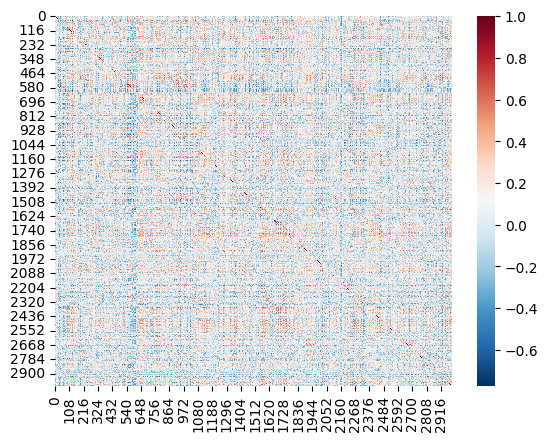

In [42]:
# plot the correlation matrix (only for the first 3000 voxels since it takes too much memory with all of them)

import seaborn as sns
sns.heatmap(full_correlation_matrix.squeeze()[0:3000, 0:3000], cmap='RdBu_r')

## Seed Based Analysis

SBA essentially focuses on a single row of the FC matrix, demonstrating the correlation of one seed region (or voxel) with the rest of the brain.

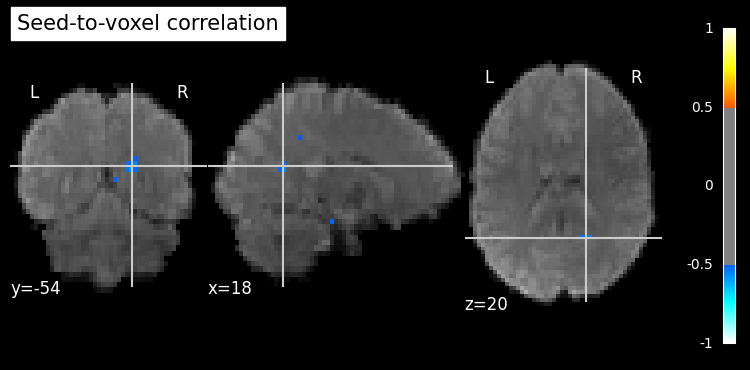

In [60]:
#let's pick a random row of the correlation matrix as a seed
correlation_row_seed = full_correlation_matrix.squeeze()[40000, :]

#convert this 1D array of seed x voxels back into image format
correlation_img_seed = unmask(correlation_row_seed, bold_mask)

#plot
display = plotting.plot_stat_map(correlation_img_seed, bg_img=nli.mean_img(img_timecourse),
                                    threshold=0.5,
                                    vmax=1,
                                    title="Seed-to-voxel correlation",
                                )

Typically you would perform SBA on a ROI-level matrix instead of a seed based one.

## Independent Component Analysis

Spatial ICA decomposes the data into sources of variance that are maximally spatially independent . Voxels with similar timecourses tend to load onto the same spatial component, because this improves the separation of sources. It will decompose the data into networks, structured confounds, and noise. It's a great way to quickly check what your data contains without requiring any a priori region of interest.

In [72]:
# Import CanICA module
from nilearn.decomposition import CanICA

# Specify relevant parameters
n_components = 10
fwhm = 6.

# Specify CanICA object
canica = CanICA(mask = bold_mask, #only compute components within the brain
                n_components=n_components, #the number of ICA components to derive - check the literature for relevant values
                smoothing_fwhm=fwhm, #size of smoothing kernel in mm
                memory="nilearn_cache", memory_level=2,
                threshold='auto', verbose=10, random_state=0, n_jobs=-1,
                standardize=True)

In [73]:
# Run/fit CanICA on input data
canica.fit(clean_img)

# Retrieve the independent components in brain space
components_img = canica.masker_.inverse_transform(canica.components_)

[MultiNiftiMasker.fit] Loading data from None.
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002949, ...,  0.009533],
       ...,
       [ 0.00071 , ..., -0.001507]], dtype=float32), n_components=10, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.4s, 0.0min


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.4s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.0s remaining:    0.9s
/home/murosevic/miniconda3/envs/env312/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/murosevic/miniconda3/envs/env312/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/murosevic/miniconda3/envs/env312/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number o

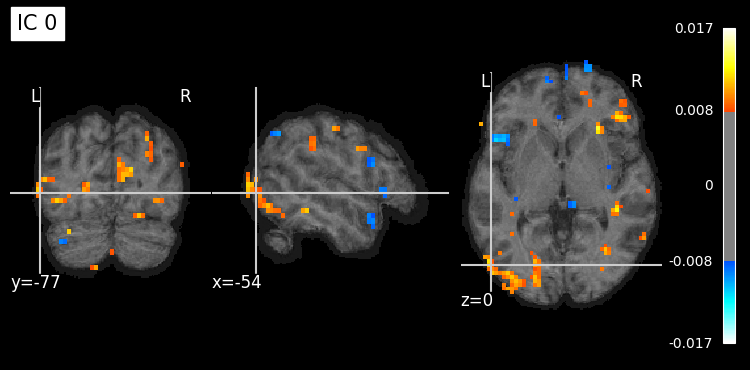

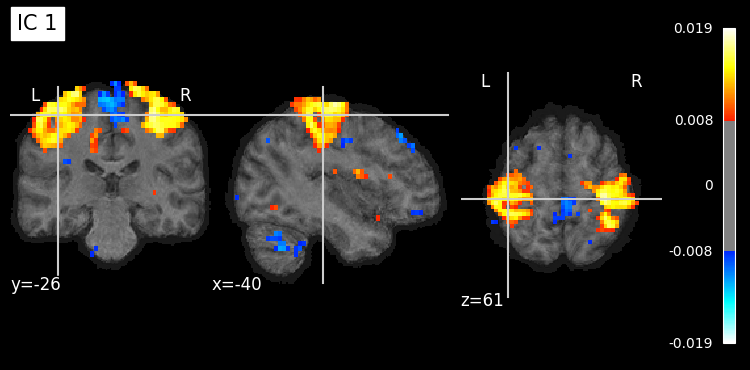

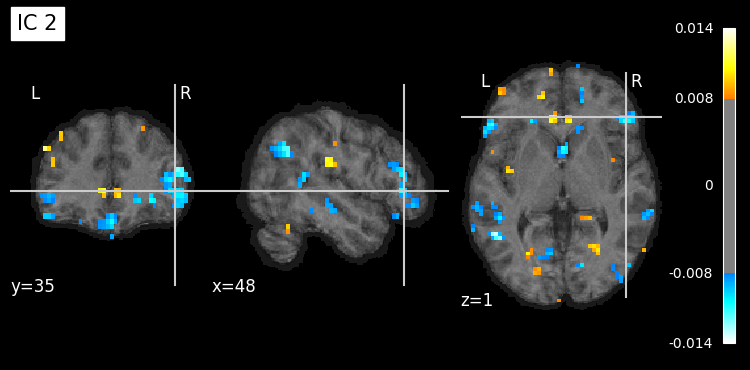

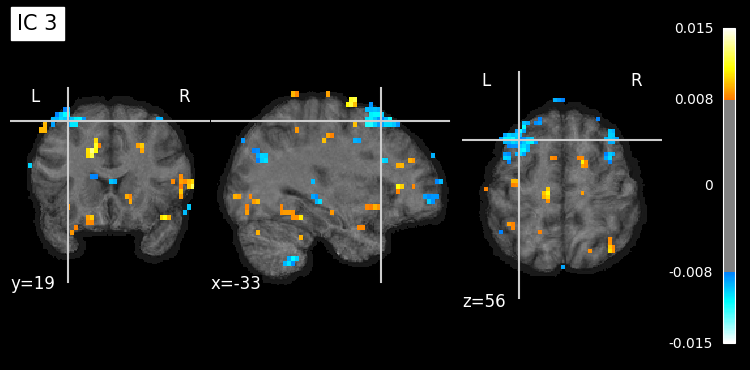

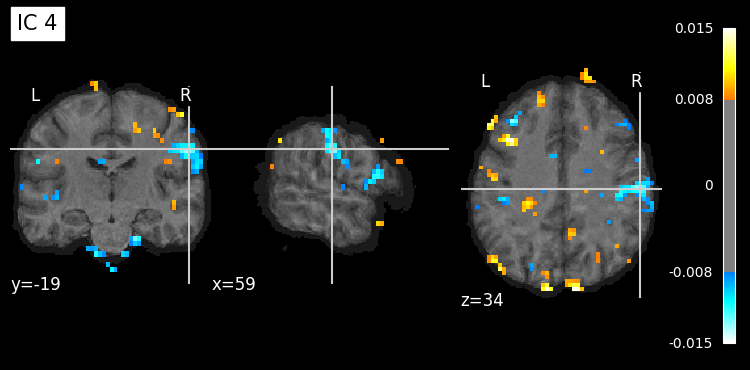

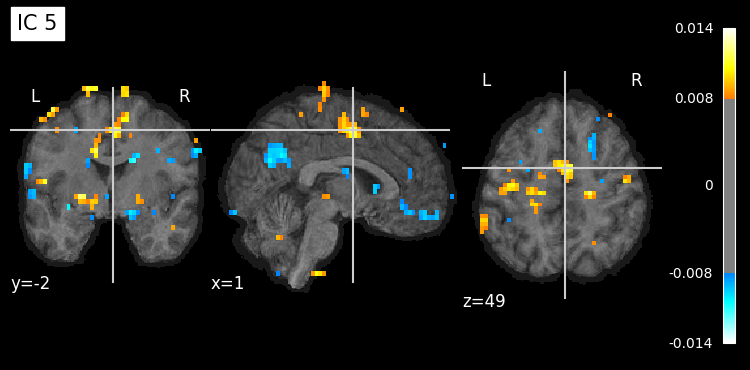

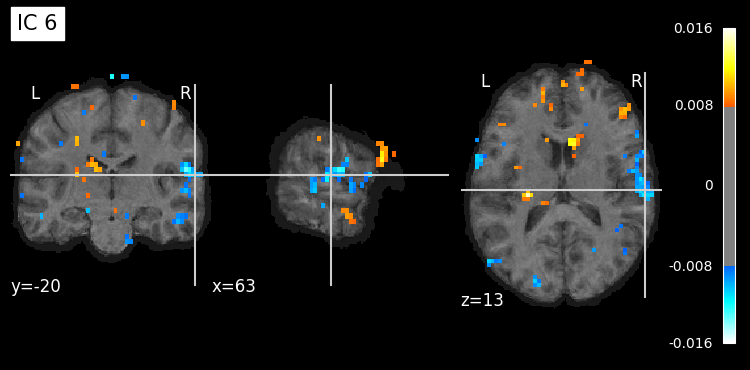

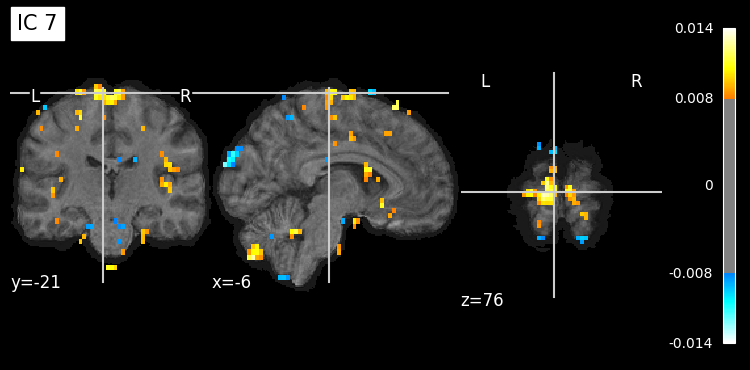

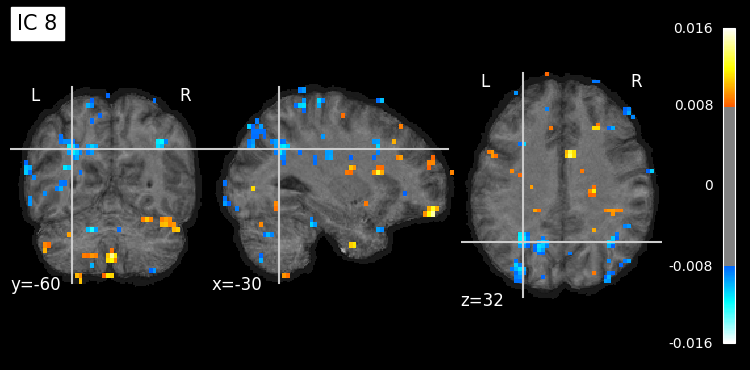

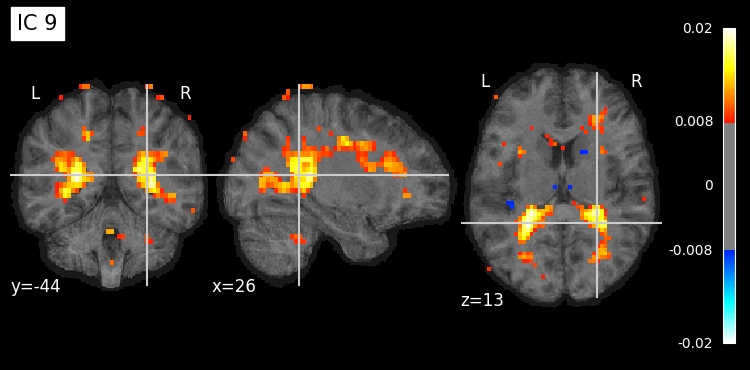

In [81]:
for i, cur_img in enumerate(nli.iter_img(components_img)):
    plotting.plot_stat_map(cur_img, display_mode="ortho", title="IC %d" % i,
                            colorbar=True, bg_img=anat_img, threshold = 0.008)

Not bad for a single subject! We can see some network-like components. If we were to run this across the whole dataset, the network components would look cleaner.